# **Feature Selection**

## **Lendo dados pós processo de data prep**

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
abt_00 = pd.read_csv('/content/drive/MyDrive/2. Study  Work/Pod Academy/Tarefas/Ciência de Dados/Projetos/Predição de Diabetes/abt_train.csv')
abt_00.drop(axis=1,columns=['Unnamed: 0'],inplace=True)
abt_00.shape

(537, 9)

In [ ]:
abt_00.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.836294,-0.800051,-0.535764,-0.157146,-0.189732,-1.060153,-0.614216,-0.948610,0
1,0.390728,-0.490543,0.128044,0.553619,2.130203,0.646467,-0.909738,-0.434667,0
2,-1.143050,0.437979,-0.093226,1.393614,1.478536,1.355371,-0.306991,-0.777296,1
3,0.083972,0.314176,-0.093226,0.036699,0.748669,0.147609,-0.906812,-0.434667,0
4,-0.836294,-0.552445,-2.195284,1.135154,0.027491,1.486650,-0.839515,-0.006380,0


In [ ]:
X = abt_00.drop(axis=1,columns='Outcome')
y = abt_00.Outcome

# Treinar modelo com algoritmo Random Forest (Calma, não precisa focar no modelo neste momento)
clf = RandomForestClassifier() # troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier
clf.fit(X, y)

RandomForestClassifier()

## **Obter importância das variáveis**

Número de features selecionadas:  4


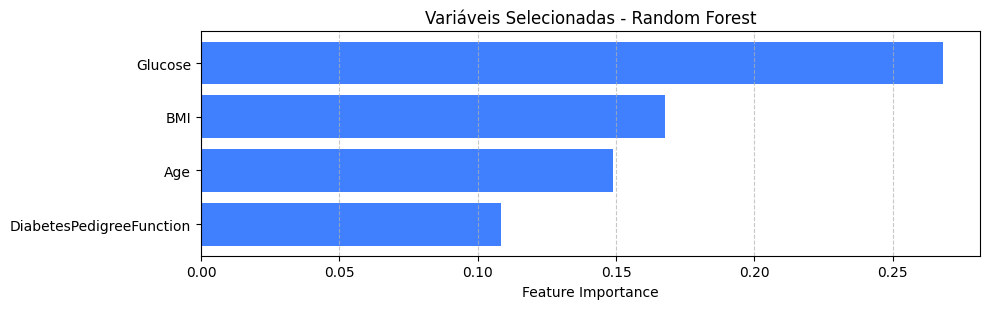

In [ ]:
# Obter importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)

# Estabelecer um limite de corte, por exemplo, x% da importância máxima
cutoff_maximp = 0.4

cutoff = cutoff_maximp * feature_importances.max()

# Selecionar variáveis acima do corte
selected_features = X.columns[feature_importances > cutoff].tolist()
print('Número de features selecionadas: ',len(selected_features))

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=True)

# Filtrar o DataFrame para apenas as features acima do corte
selected_features_df = features[features['Importance'] > cutoff]

# Ajusta o tamanho da figura com base no número de features selecionadas
plt.figure(figsize=(10, len(selected_features_df)*0.8))

# Plota as features selecionadas
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color=(0.25, 0.5, 1))
plt.xlabel("Feature Importance")
plt.title("Variáveis Selecionadas - Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Salvar a lista em um arquivo .pkl
import pickle
with open('/content/drive/MyDrive/2. Study  Work/Pod Academy/Tarefas/Ciência de Dados/Projetos/Predição de Diabetes/02 Feature Selection/prd_list_features_a014.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

In [ ]:
# Carregar a lista do arquivo .pkl
with open('/content/drive/MyDrive/2. Study  Work/Pod Academy/Tarefas/Ciência de Dados/Projetos/Predição de Diabetes/02 Feature Selection/prd_list_features_a014.pkl', 'rb') as f:
    loaded_lista = pickle.load(f)

print(loaded_lista)

['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
lista_features = loaded_lista + ['Outcome']
abt_01 = abt_00[lista_features]

abt_01.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.800051,-1.060153,-0.614216,-0.948610,0
1,-0.490543,0.646467,-0.909738,-0.434667,0
2,0.437979,1.355371,-0.306991,-0.777296,1
3,0.314176,0.147609,-0.906812,-0.434667,0
4,-0.552445,1.486650,-0.839515,-0.006380,0


In [ ]:
abt_test = pd.read_csv('/content/drive/MyDrive/2. Study  Work/Pod Academy/Tarefas/Ciência de Dados/Projetos/Predição de Diabetes/abt_test.csv')
abt_test.drop(axis=1,columns=['Unnamed: 0'],inplace=True)
abt_test.shape

(231, 9)

In [ ]:
lista_features = loaded_lista + ['Outcome']
abt_01_test = abt_test[lista_features]

abt_01_test.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.707199,0.265760,-0.116804,0.850192,0
1,-0.273888,0.488933,-0.941923,-1.034268,0
2,-0.397691,-0.154332,-0.912664,-1.034268,0
3,-0.428642,-0.968258,1.129653,0.079277,0
4,0.468930,-0.272482,-0.760514,1.449793,0


## **Salvando abt para treinamento dos modelos**

In [ ]:
# Salvando abt para treinamento dos modelos

abt_01.to_csv('/content/drive/MyDrive/2. Study  Work/Pod Academy/Tarefas/Ciência de Dados/Projetos/Predição de Diabetes/abt_fs01_train.csv')
abt_01_test.to_csv('/content/drive/MyDrive/2. Study  Work/Pod Academy/Tarefas/Ciência de Dados/Projetos/Predição de Diabetes/abt_fs01_test.csv')